# Main Aim
To create a model which could predict whether a review left by a consumer on amazon review page is negative, positive or neutral. Our model will have heavy text-based training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("amazon-fashion-800k+-user-reviews-dataset.csv")
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchases,target
0,1.0,It say 5 pair when purchasing but only get 2 r...,I was looking for 5 pair and only received 2 p...,[],B07QFTMTLP,B07QFTMTLP,AHASEZ65RESN57BMGRV6QBM5DTIA,1565088068852,0,True,-1
1,1.0,DonÃ¢ÂÂt do it!,Just donÃ¢ÂÂt. These things fell apart after...,[],B0764KKDN1,B0764KKDN1,AE3AMA3QSOHFKV46JJAHTHMMIR6A,1622416429592,0,True,-1
2,1.0,Small,Retuned is too small for me,[],B07J1WHVCP,B07J1WHVCP,AH4CFWQE2HTC5BSWIEF3LVLUFK6A,1565284666220,0,True,-1
3,1.0,Pre-Used When Received,This product came with the sleeves turned insi...,[],B0773JWP64,B0773JWP64,AFEKQFJWST6MVTKEJBQKUUBTWK7A,1581963636172,0,False,-1
4,1.0,Worn once and several places at seams have com...,Worn once and several places at seams have com...,[],B099NST9RX,B08JGNS1NK,AGU2FPKN6ARXUSSGBT6WTVLZKJSQ,1640895438476,0,True,-1
...,...,...,...,...,...,...,...,...,...,...,...
867305,5.0,Product,Love them,[],B01N26KMKX,B01N26KMKX,AEEA4C6HR7JZFFAKHUMGNSZXV5NQ,1549972439290,0,True,1
867306,5.0,Nice fit!,Loved this product. The workout tops fit perfe...,[],B018427MOC,B09M6X79V9,AGV4T22Y3EO3ZYEN3BVCL5W3UA2Q,1562044504022,0,True,1
867307,5.0,More beautiful than I would have thought!,This is a stunning product and well worth the ...,[],B07NBGT4B3,B07NBGT4B3,AHMSJGOAVTXUWSWIPPLMPGB5MJOQ,1572543959383,1,True,1
867308,5.0,Samuraiiii,So comfortable. I could wear this around all d...,[],B01NBU0W06,B01MUAE268,AHWQFFYRAMTIABJXRG3GFPHJ73VA,1603247453979,0,True,1


In [3]:
df.dropna(inplace=True)
df["verified_purchases"] = df["verified_purchases"].map({True: 1, False: 0})
df.reset_index(drop=True, inplace=True)

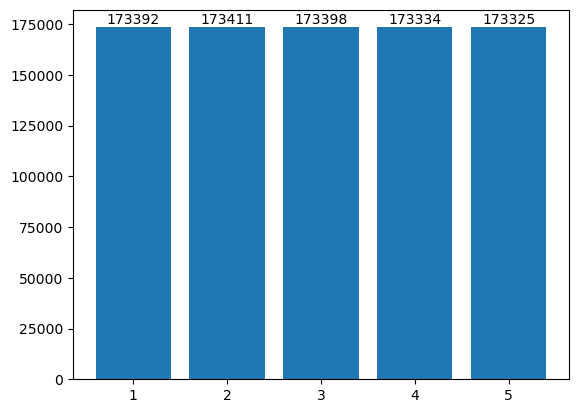

In [4]:
ratings = df["rating"].value_counts().sort_index()
plt.bar(ratings.index, ratings.values)
offset = ratings.values.max() * 0.01
for x, y in zip(ratings.index, ratings.values):
    plt.text(x, y + offset, str(y), ha="center")
plt.show()

There is not much to explore on this data as it has more categorical values than it has numerical, further data visualization is only possible after we convert the categorical values to numerical

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["rating"]):
    train_set = df.iloc[train_index].copy()
    test_set = df.iloc[test_index].copy()

In [6]:
# We won't need the product id (asin) or product parent id (parent_asin) columns
cols_to_drop = ["asin", "parent_asin", "images", "user_id", "timestamp"]
train_set = train_set.drop(cols_to_drop, axis=1)
test_set = test_set.drop(cols_to_drop, axis=1)

test_set.to_csv("Testing_data.csv", index=False)

In [7]:
train_set

,rating,title,text,helpful_vote,verified_purchases,target
672046,4.0,These are not capris,"I'll keep these. But... I'm 5'9. Almost 5'10""....",0,0,1
569663,4.0,Size up,I normally wear a 32C and bought a medium. It ...,0,0,1
63220,1.0,Item arrived cracked,Item is cracked and unusable,0,1,-1
505500,3.0,Sizing way off!,Heads up to anyone out here purchasing these t...,0,1,0
63839,1.0,Black Representation Matters,At very least use a Black person to model the ...,15,0,-1
...,...,...,...,...,...,...
89720,1.0,Wretched,One of these bags broke with two gaping holes ...,0,1,-1
560295,4.0,Great Layering Shirt,This is a great shirt for layering. It is lon...,0,0,1
500963,3.0,Three Stars,love this but it doesn't stay in the folded po...,1,1,0
693286,4.0,I'm not crazy about the material.,"Comfortable fit. Length is good, pretty colors.",0,1,1


In [8]:
features = train_set.drop("target", axis=1)
labels = train_set["target"].copy()

In [9]:
num_attrs = features.drop(["title", "text"], axis=1).columns
cat_attrs = ["title", "text"]

Dealing with the columns that contains the texts

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# We need a class which can combine our title and text column as TfidfVectorizer only takes 1 iterable strings
from sklearn.base import BaseEstimator, TransformerMixin

class Text_combiner(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return (
            X[self.columns].fillna("").agg(" ".join, axis=1)
        )

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC

In [13]:
text_pipeline = Pipeline([
    ("text_handling", Text_combiner(["title", "text"])),
     ("tfidf", TfidfVectorizer(max_features=50_000, ngram_range=(1,2),stop_words="english", min_df=5))
     ])

preprocessor = ColumnTransformer([
    ("text", text_pipeline, cat_attrs),
    ("num", "passthrough", num_attrs)
])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [15]:
log_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

log_scores = cross_val_score(
    log_pipeline,
    features,
    labels,
    cv=10,
    scoring="f1_macro"
)

print(pd.Series(log_scores).describe())

count    10.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
dtype: float64


In [16]:
svc_pipeline = Pipeline([
("preprocessor", preprocessor),
("clf", LinearSVC())
])

svc_scores = cross_val_score(
    svc_pipeline,
    features,
    labels,
    cv=10,
    scoring="f1_macro"
)

print(pd.Series(svc_scores).describe())

count    10.000000
mean      0.988076
std       0.000376
min       0.987667
25%       0.987720
50%       0.988058
75%       0.988352
max       0.988759
dtype: float64


Hence, we will be using the Logistic Regression model to make predictions